## **CEV Chile: Desempeño energético actual de viviendas (pre) Calificadas**
Los datos analizados fueron descargados desde el sitio web oficial de la calificación.\
*Fuente: [(http://calificacionenergeticaweb.minvu.cl/)](http://calificacionenergeticaweb.minvu.cl/Publico/BusquedaVivienda.aspx)*
 
La calificación energética de viviendas es una estimación teórica de la demanda 
de energía para calefacción, enfriamiento, agua caliente sanitaria e iluminación, 
la cual se presenta comparativamente respecto a una vivienda de referencia y se 
presenta junto a una escala gráfica de ocho niveles, que van desde la “A+” a la 
“G”, siendo la “A+” la que representa una mayor eficiencia.

<img src="./escala_cev.png" style="width:450px; float: middle; margin: 40PX 40px 40px 40px;"></img>

La calificación se determina con base en la relación entre el requerimiento energético de demanda de la vivienda que está siendo calificada y una vivienda de referencia.

In [39]:
from cev_analysis import *
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

El set de datos utilizado fue obtenido en Octubre de 2021.

Contiene 7 columnas: 
* Identificación Vivienda
* Proyecto	
* Tipología: Departamento, Casa Aislada, Casa Pareada / Continua
* Comuna	
* Región	
* Status : Pre-calificación / Calificación
* CE: A, B, C, D, E, F, G, I
* CEE A, B, C, D, E, F, G, NaN

In [40]:
file = './cev_chile-oct-2021.csv'
df = CEV().cev_dataframe(file)
df.head()

A dia de hoy, 76484 viviendas han participado en este proceso, las cuales pertenecen a 817 proyectos diferentes.
  - Número de viviendas PRE-calificadas: 43587 viviendas
  - Número de viviendas Calificadas: 32897 viviendas
Las viviendas se encuentran repartidas en 173 comunas y 16 regiones del pais.


,Identificación Vivienda,Proyecto,Tipología,Comuna,Región,Status,CE,CEE
0,29468-Piso 1 - nor-oriente TORRE A,CONSTRUCCIÓN DE OBRA NUEVA 64 DEPTOS Y 1 SEDE ...,Departamento,Alto Hospicio,Tarapacá,Pre-calificación,D,E
1,29470-Piso 1 - sur-poniente TORRE A,CONSTRUCCIÓN DE OBRA NUEVA 64 DEPTOS Y 1 SEDE ...,Departamento,Alto Hospicio,Tarapacá,Pre-calificación,F,F
2,29471-Piso 1 - sur-oriente TORRE A,CONSTRUCCIÓN DE OBRA NUEVA 64 DEPTOS Y 1 SEDE ...,Departamento,Alto Hospicio,Tarapacá,Pre-calificación,F,E
3,29473-Piso 2 - nor-poniente TORRE A,CONSTRUCCIÓN DE OBRA NUEVA 64 DEPTOS Y 1 SEDE ...,Departamento,Alto Hospicio,Tarapacá,Pre-calificación,E,E
4,29474-Piso 2 - sur-poniente TORRE A,CONSTRUCCIÓN DE OBRA NUEVA 64 DEPTOS Y 1 SEDE ...,Departamento,Alto Hospicio,Tarapacá,Pre-calificación,F,F


### **1. Participación por regiones**

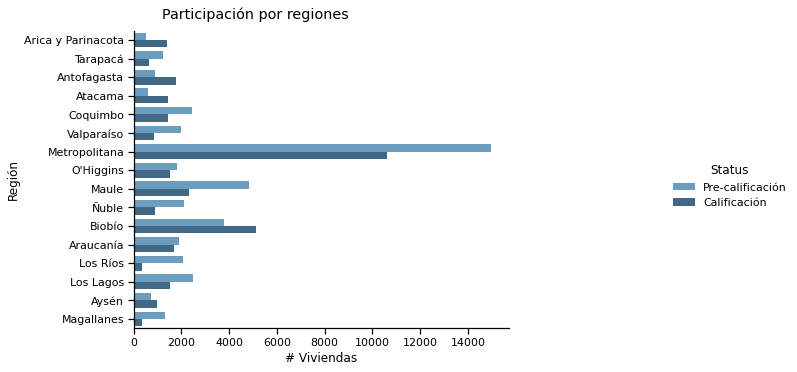

El top 5  de regiones con mayor participación:
Metropolitana   33.45
Biobío          11.64
Maule            9.33
Los Lagos        5.26
Coquimbo         5.02
Name: Región, dtype: float64
Estas 5 regiones componen el 65.0% del total nacional.


In [41]:
sns.set_context('notebook')
g = sns.catplot(y='Región', data=df, kind='count', hue='Status', palette= 'Blues_d')
g.fig.suptitle("Participación por regiones", y=1.03)
g.set(ylabel="Región", xlabel="# Viviendas") 
g.fig.set_size_inches(15,5)
plt.show()
print(f"El top 5  de regiones con mayor participación:")
print(f"{df['Región'].value_counts(normalize=True)[:5] * 100}")
print(f"Estas 5 regiones componen el {df['Región'].value_counts(normalize=True)[:5].sum().round(2) * 100}% del total nacional.")

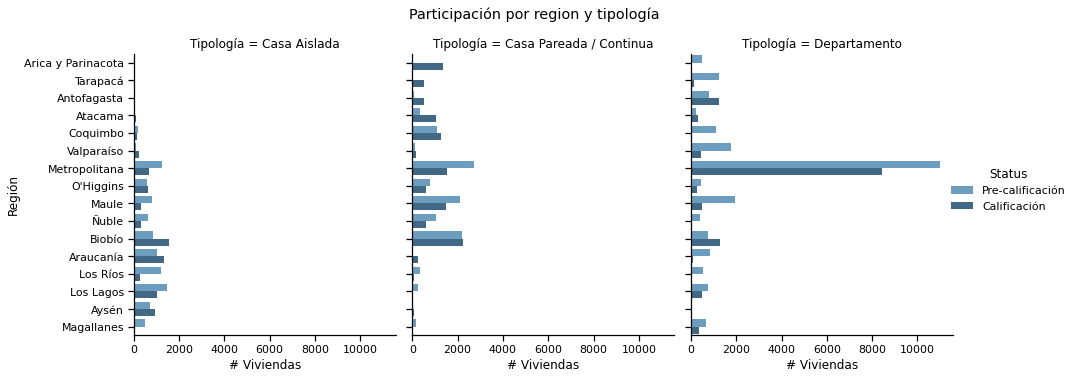

In [42]:
sns.set_context('notebook')
g = sns.catplot(y='Región', data=df, kind='count', hue='Status', col='Tipología', palette= 'Blues_d')
g.fig.suptitle("Participación por region y tipología", y=1.05)
g.set(ylabel="Región", xlabel="# Viviendas") 
g.fig.set_size_inches(15,5)
plt.show()

### __2. Desempeño energetico:__ Calificación de *arquitectura* y de *consumo energético*

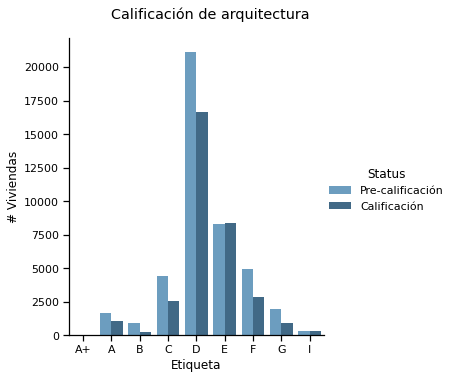

In [43]:
sns.set_context('notebook')
g = sns.catplot(x='CE', data=df, kind='count', hue='Status', palette= 'Blues_d')
g.fig.suptitle("Calificación de arquitectura", y=1.05)
g.set(xlabel="Etiqueta", ylabel="# Viviendas") 
plt.show()

In [44]:
print(f"Porcentaje por calificación:")
print(f"{df['CE'].value_counts(normalize=True).round(3) * 100}") 

Porcentaje por calificación:
D    49.40
E    21.80
F    10.30
C     9.10
G     3.70
A     3.50
B     1.50
I     0.80
A+    0.00
Name: CE, dtype: float64


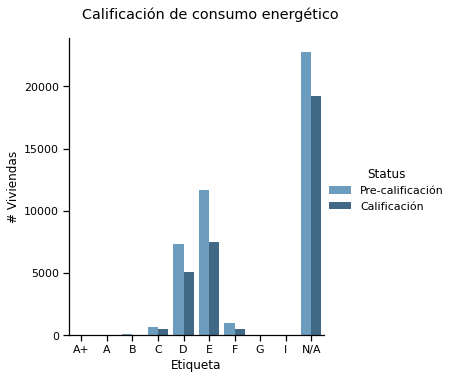

In [45]:
sns.set_context('notebook')
g = sns.catplot(x='CEE', data=df, kind='count', hue='Status', palette= 'Blues_d')
g.fig.suptitle("Calificación de consumo energético", y=1.05)
g.set(xlabel="Etiqueta", ylabel="# Viviendas") 
plt.show()

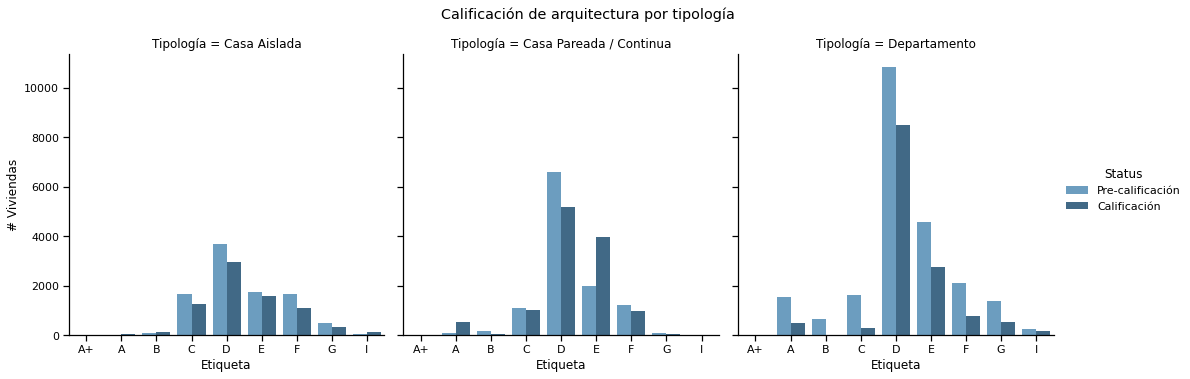

In [46]:
sns.set_context('notebook')
g = sns.catplot(x='CE', data=df, kind='count', hue='Status', col='Tipología', palette='Blues_d')
g.fig.suptitle("Calificación de arquitectura por tipología", y=1.05)
g.set(xlabel="Etiqueta", ylabel="# Viviendas") 
plt.show()

## __3. Proyectos destacados__: Etiqueta A *(calificación de arquitectura)*

In [47]:
index = df['CE'] <= 'A'
proy_dest = df.loc[index, :]
print(f"Total de proyectos destacados a nivel nacional: {proy_dest['Proyecto'].unique().shape[0]}")
print(f"Total de viviendas destacadas a nivel nacional: {proy_dest['Identificación Vivienda'].unique().shape[0]}")

Total de proyectos destacados a nivel nacional: 41
Total de viviendas destacadas a nivel nacional: 2688


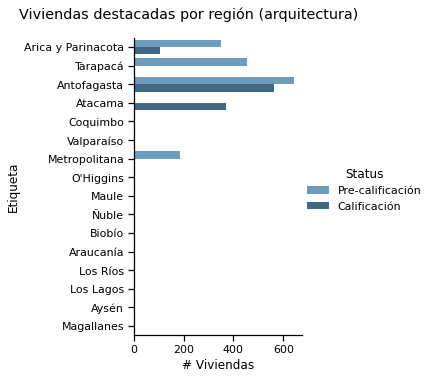

In [48]:
sns.set_context('notebook')
g = sns.catplot(y='Región', data=proy_dest, kind='count', hue='Status', palette='Blues_d')
g.fig.suptitle("Viviendas destacadas por región (arquitectura)", y=1.05)
g.set(ylabel="Etiqueta", xlabel="# Viviendas") 
# plt.xticks(rotation=45)
# g.fig.set_size_inches(15,5)
plt.show()

In [49]:
count = proy_dest['Región'].value_counts()
print(count[count>0])

Antofagasta           1202
Arica y Parinacota     458
Tarapacá               455
Atacama                370
Metropolitana          187
Valparaíso               8
Los Lagos                5
Coquimbo                 1
Biobío                   1
Los Ríos                 1
Name: Región, dtype: int64


## **4. Participación en la** ***región de Los Lagos***

In [50]:
# print(df['Región'].unique())
region = 'Los Lagos'
df1 = df[df['Región']==region].copy().reset_index()
df1["Comuna"] = df1["Comuna"].cat.remove_categories(removals=list(set(df["Comuna"].unique().tolist())-set(df1["Comuna"].unique().tolist()))) 
comunas = df1["Comuna"].unique()
df1.head()
print(f"Comunas con participación:")
print(f"{df1['Comuna'].value_counts()}")

Comunas con participación:
Puerto Montt    1516
Osorno          1140
Puerto Varas     544
Frutillar        262
Dalcahue         159
Ancud            158
Fresia           134
Quinchao          87
Puqueldón         21
Llanquihue         1
Name: Comuna, dtype: int64


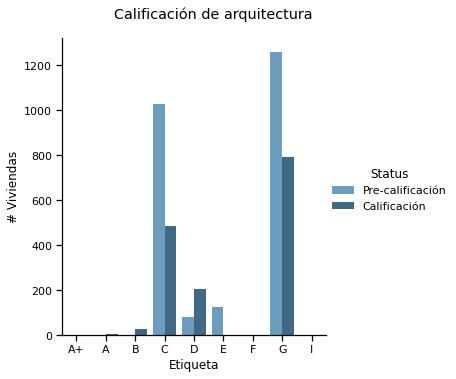

In [51]:
sns.set_context('notebook')
g = sns.catplot(x='CE', data=df1, kind='count', hue='Status', palette= 'Blues_d')
g.fig.suptitle("Calificación de arquitectura", y=1.05)
g.set(xlabel="Etiqueta", ylabel="# Viviendas") 
plt.show()

In [52]:
print(f"Porcentaje por calificación:")
print(f"{df1['CE'].value_counts(normalize=False)}") 

Porcentaje por calificación:
G     2053
C     1517
D      290
E      127
B       30
A        5
A+       0
F        0
I        0
Name: CE, dtype: int64


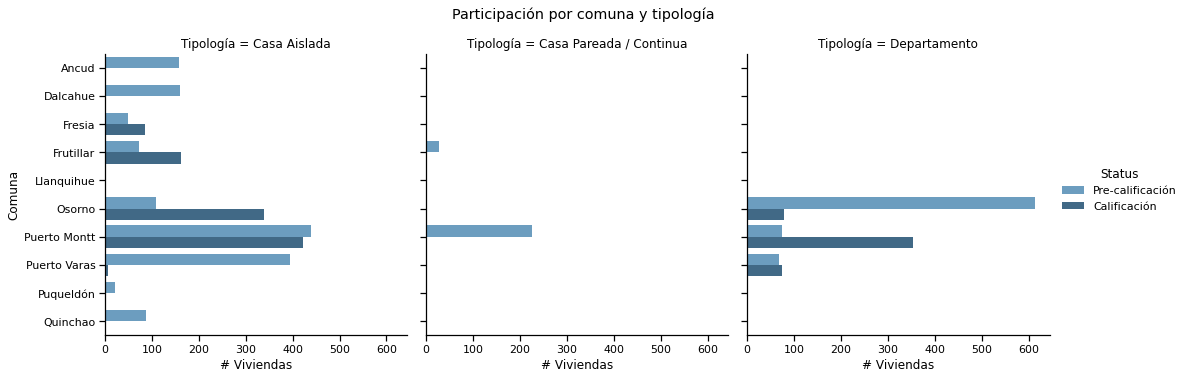

In [53]:
sns.set_context('notebook')
g = sns.catplot(y='Comuna', data=df1, kind='count', hue='Status', col='Tipología', palette= 'Blues_d')
g.fig.suptitle("Participación por comuna y tipología", y=1.05)
g.set(ylabel="Comuna", xlabel="# Viviendas") 
# plt.xticks(rotation=45)
# g.fig.set_size_inches(15,5)
plt.show()

In [54]:
index = df1['CE'] <= 'A'
dest = df1.loc[index, :]
print(f"Total de proyectos destacados a nivel regional: {dest['Proyecto'].unique().shape[0]}")
print(f"Total de viviendas destacadas a nivel regional: {dest['Identificación Vivienda'].unique().shape[0]}")

Total de proyectos destacados a nivel regional: 3
Total de viviendas destacadas a nivel regional: 5


In [55]:
dest

,index,Identificación Vivienda,Proyecto,Tipología,Comuna,Región,Status,CE,CEE
1662,37837,118976-Edificio 3 - Departamento 402,Condominios Edificios Senderos de Bellavista,Departamento,Osorno,Los Lagos,Calificación,A,C
1664,37839,118950-Edificio 4 - Departamento 301,Condominios Edificios Senderos de Bellavista,Departamento,Osorno,Los Lagos,Calificación,A,C
1677,37852,118951-Edificio 4 - Departamento 401,Condominios Edificios Senderos de Bellavista,Departamento,Osorno,Los Lagos,Calificación,A,C
3833,40008,21011-CASA MIRADOR,CASA MIRADOR,Casa Aislada,Puerto Varas,Los Lagos,Calificación,A,C
3834,40009,36782-Casa A & K,Casa A&K,Casa Aislada,Puerto Varas,Los Lagos,Calificación,A,D


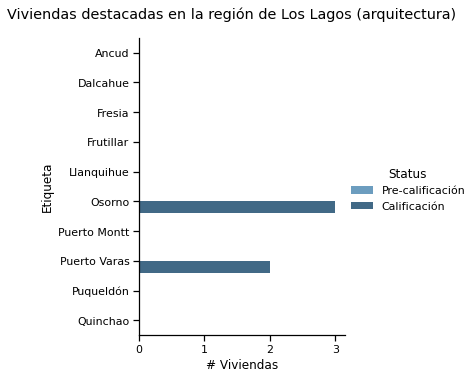

In [58]:
sns.set_context('notebook')
g = sns.catplot(y='Comuna', data=dest, kind='count', hue='Status', palette='Blues_d')
g.fig.suptitle(f"Viviendas destacadas en la región de {region} (arquitectura)", y=1.05)
g.set(ylabel="Etiqueta", xlabel="# Viviendas") 
plt.show()